# DenseNet121 for Breast Cancer diagnosis

## Importing the libraries

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
print(tf.__version__)

from PIL import Image
print(Image.__file__)

2.3.0
D:\Users\razva\anaconda3\envs\tf\lib\site-packages\PIL\Image.py


In [2]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
print(tf.__version__)

from PIL import Image
print(Image.__file__)

2.3.0
D:\Users\razva\anaconda3\envs\tf\lib\site-packages\PIL\Image.py


In [3]:
import sys
from PIL import Image
sys.modules['Image'] = Image

In [4]:
from tensorflow.keras.layers import Dense,Activation,Dropout,Flatten, Conv2D, MaxPooling2D,MaxPool2D,GlobalAveragePooling2D,BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model

In [5]:
import tensorflow 

import pandas as pd
import numpy as np
import os
import keras
import random
import cv2
import math

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,Convolution2D,BatchNormalization
from tensorflow.keras.layers import Flatten,MaxPooling2D,Dropout

from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array

from tensorflow.keras.models import Model

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

import warnings

## Data preprocessing

In [6]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('BreastsData/training_set',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 345 images belonging to 3 classes.


In [7]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('BreastsData/test_set',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 71 images belonging to 3 classes.


## DenseNet121

In [8]:
model_d=DenseNet121(weights='imagenet',include_top=False, input_shape=(224, 224, 3)) 
x=model_d.output
x= GlobalAveragePooling2D()(x)
x= BatchNormalization()(x)
x= Dropout(0.5)(x)
x= Dense(1024,activation='relu')(x) 
x= Dense(512,activation='relu')(x) 
x= BatchNormalization()(x)
x= Dropout(0.5)(x)
preds=Dense(3,activation='softmax')(x) #FC-layer

model=Model(inputs=model_d.input,outputs=preds)
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
_______________________________________________________________________________________

In [9]:
for layer in model.layers[:-8]:
    layer.trainable=False
    
for layer in model.layers[-8:]:
    layer.trainable=True

In [10]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy',tf.keras.metrics.Precision()])
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
_______________________________________________________________________________________

In [11]:
history = model.fit(x = training_set, validation_data = test_set, epochs = 20)

Epoch 1/20
11/11 [==============================] - 28s 3s/step - loss: 0.8618 - accuracy: 0.7159 - precision: 0.7219 - val_loss: 0.3206 - val_accuracy: 0.8592 - val_precision: 0.8571
Epoch 2/20
11/11 [==============================] - 36s 3s/step - loss: 0.3817 - accuracy: 0.8841 - precision: 0.8866 - val_loss: 0.4253 - val_accuracy: 0.8169 - val_precision: 0.8143
Epoch 3/20
11/11 [==============================] - 54s 5s/step - loss: 0.3260 - accuracy: 0.9072 - precision: 0.9096 - val_loss: 0.4751 - val_accuracy: 0.8028 - val_precision: 0.8028
Epoch 4/20
11/11 [==============================] - 42s 4s/step - loss: 0.3873 - accuracy: 0.8783 - precision: 0.8808 - val_loss: 0.3159 - val_accuracy: 0.8169 - val_precision: 0.8169
Epoch 5/20
11/11 [==============================] - 36s 3s/step - loss: 0.2965 - accuracy: 0.8783 - precision: 0.8783 - val_loss: 0.3528 - val_accuracy: 0.8028 - val_precision: 0.8028
Epoch 6/20
11/11 [==============================] - 30s 3s/step - loss: 0.2654 -

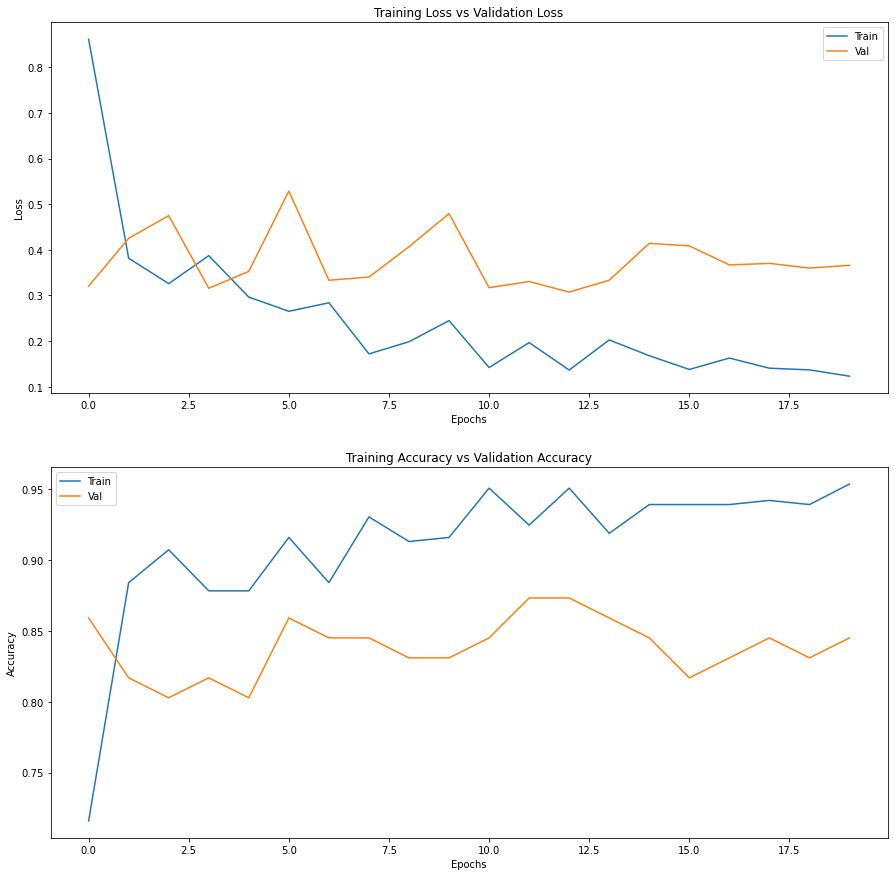

In [12]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))

axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend(['Train','Val'])

axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend(['Train', 'Val'])

In [13]:
training_set.class_indices

{'benign': 0, 'cancer': 1, 'normal': 2}

## Making one prediction

In [14]:
import numpy as np
from keras.preprocessing import image

test_image = image.load_img('OnePrediction/cancer/5.jpg', target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices


the_result = -1
value=float('-inf')

for i in range(len(result[0])):
    if result[0][i]-value>0.00001: 
        the_result = i
        value = result[0][i]

if the_result == 0:
    prediction = 'benign'
elif the_result:
    prediction = 'cancer'
else: 
    prediction = 'normal'



In [15]:
print(prediction)

cancer
